<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-обработка-данных" data-toc-modified-id="Изучение-и-обработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и обработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Количество-выпускавшихся-игр-в-год" data-toc-modified-id="Количество-выпускавшихся-игр-в-год-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество выпускавшихся игр в год</a></span></li></ul></li><li><span><a href="#Предпочтения-пользователей-по-регионам" data-toc-modified-id="Предпочтения-пользователей-по-регионам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предпочтения пользователей по регионам</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые." data-toc-modified-id="Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</a></span></li><li><span><a href="#Средние-пользовательские-рейтинги-жанров-Action-(англ.-«действие»,-экшен-игры)-и-Sports-(англ.-«спортивные-соревнования»)-разные." data-toc-modified-id="Средние-пользовательские-рейтинги-жанров-Action-(англ.-«действие»,-экшен-игры)-и-Sports-(англ.-«спортивные-соревнования»)-разные.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</a></span></li></ul></li></ul></div>

# Закономерности, определяющие успешность игры 

Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.  
На основе этой информации нам нужно выявить определяющие успешность игры закономерности.   
Указанная информация позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение и обработка данных

In [ ]:
# Импортируем все библиотеки, которые могут нам понадобиться в работе
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from scipy import stats as st
import math
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=35

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
try:
    data=pd.read_csv('/datasets/games.csv')
except:
    data=pd.read_csv('games.csv')
display(data.head())
data.info()
print()
print('Количество повторяющихся строк:', data.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Количество повторяющихся строк: 0


В представленной таблице всего 11 колонок и 16 715 строк. Числовые данные содержатся в 6 колонках, 5 колонок имеют тип данных - object.  
Каждая строка содержит информацию об 1 выпущенной игре (имя, платформа, год выпуска, жанр, продажи по регионам, рейтинг).  

Для начала приведем наименования столбцов к общепринятому виду:

In [ ]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


И приведем все значения в колонке "platform", "name" и "genre" к нижнему регистру.

In [ ]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

Проверим количество пропусков:

In [ ]:
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.01
platform,0
year_of_release,1.61
genre,0.01
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,51.32
user_score,40.09


Как мы видим, в колонках 'name', 'year_of_release' и 'genre' пропущены совсем маленькие доли даных. можем вырезать указанные строки, они не повлияют на итоговый результат исследования.  


In [ ]:
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

В колонках с рейтингом пропущено существенное количество срок (от 40 до 51%).

In [ ]:
missed_critic_score = data.query('critic_score == "NaN"').pivot_table(index=['year_of_release'], values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['sum'])
sales_by_years = data.pivot_table(index='year_of_release',values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc=['sum'])
missed_critic_score_1 = missed_critic_score / sales_by_years
missed_critic_score_1

sum                                
                 eu_sales  jp_sales  na_sales other_sales
year_of_release                                          
1980.0           1.000000       NaN  1.000000    1.000000
1981.0           1.000000       NaN  1.000000    1.000000
1982.0           1.000000       NaN  1.000000    1.000000
1983.0           1.000000  1.000000  1.000000    1.000000
1984.0           1.000000  1.000000  1.000000    1.000000
1985.0           0.993671  1.000000  1.000000    0.989130
1986.0           1.000000  1.000000  1.000000    1.000000
1987.0           1.000000  1.000000  1.000000    1.000000
1988.0           0.996965  1.000000  1.000000    0.989899
1989.0           1.000000  1.000000  1.000000    1.000000
1990.0           1.000000  1.000000  1.000000    1.000000
1991.0           1.000000  1.000000  1.000000    1.000000
1992.0           1.000000  1.000000  0.999410    1.000000
1993.0           1.000000  1.000000  1.000000    1.000000
1994.0           0.982527  0.984407  0.986151    0.963636
1995.0           1.000000  1.000000  1.000000    1.000000
1996.0           0.852306  0.929318  0.907215    0.836151
1997.0           0.750621  0.796399  0.796201    0.729463
1998.0           0.797010  0.754996  0.835307    0.775658
1999.0           0.731131  0.815246  0.801364    0.737052
2000.0           0.432064  0.729016  0.512381    0.435456
2001.0           0.184213  0.399900  0.142488    0.157061
2002.0           0.181412  0.548372  0.174522    0.153282
2003.0           0.244870  0.495906  0.221373    0.218364
2004.0           0.187360  0.442017  0.171498    0.095682
2005.0           0.248947  0.292242  0.215941    0.202780
2006.0           0.167409  0.433957  0.111166    0.134198
2007.0           0.185401  0.405872  0.192100    0.184886
2008.0           0.204096  0.373278  0.222346    0.248465
2009.0           0.204161  0.441913  0.265564    0.281727
2010.0           0.213744  0.565137  0.255779    0.215298
2011.0           0.194944  0.549086  0.183299    0.182938
2012.0           0.123658  0.471815  0.126060    0.120475
2013.0           0.210119  0.598658  0.211194    0.168188
2014.0           0.370702  0.645251  0.399562    0.385012
2015.0           0.365902  0.649164  0.360940    0.371495
2016.0           0.188989  0.772139  0.219898    0.192680

Продажи игр, у которых не указан итоговый рейтинг составляют существенную долю продаж, удалять указанные строки нельзя. Давайте выделим эти игры в отдельную категорию, для этого, чтобы в ячейках все-таки присутствовали значения - заполним их значением "999".

In [ ]:
data[['critic_score', 'user_score', 'rating']]=data[['critic_score', 'user_score', 'rating']].fillna(999)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,999.0,999,999
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,999.0,999,999
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,999.0,999,999
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,999.0,999,999
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,999.0,999,999
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,999.0,999,999


Теперь приведем колонку с датой выпуска к соответствующему типу.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].dt.year
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,999.0,999,999
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,999.0,999,999
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,999.0,999,999
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,999.0,999,999
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,999.0,999,999
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,999.0,999,999


Посмотрим, что содержится в колонке 'user_score' из-за чего она имеет тип object

In [ ]:
data['user_score'].value_counts()

999    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
1.5       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Мы видим, что 2376 игр имеют значение tbd, что означает - To Be Determined (будет определено). Это означает, что рейтинг игры еще не определен. Заменим указанное значение на "555".

In [ ]:
data['user_score'] = data['user_score'].replace('tbd', 555)
data['user_score'] = data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь также проверим столбец 'rating'

In [ ]:
data['rating'].value_counts()

999     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

В этом столбце содержится информация о присвоенном рейтинге Entertainment Software Rating Board (ESRB).  
E - «Everyone» — «Для всех»  
T - «Teen» — «Подросткам»  
M - «Mature» — «Для взрослых»  
E10+ - «Everyone 10 and older» — «Для всех от 10 лет и старше»  
EC - «Early childhood» — «Для детей младшего возраста»  
K-A - версия «Early childhood» до 1998 года  
АО - Adults only - устаревшая аббревиатура «Mature» — «Для взрослых»  
RP - «Rating Pending» — «Рейтинг ожидается»

## Расчёты и добавление результатов в таблицу

Рассчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [ ]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,999.0,999.0,999,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,999.0,999.0,999,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,999.0,999.0,999,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,999.0,999.0,999,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,999.0,999.0,999,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,999.0,999.0,999,0.01


## Исследовательский анализ данных

### Количество выпускавшихся игр в год

Посмотрим, какое количество игр выпускалось каждый год

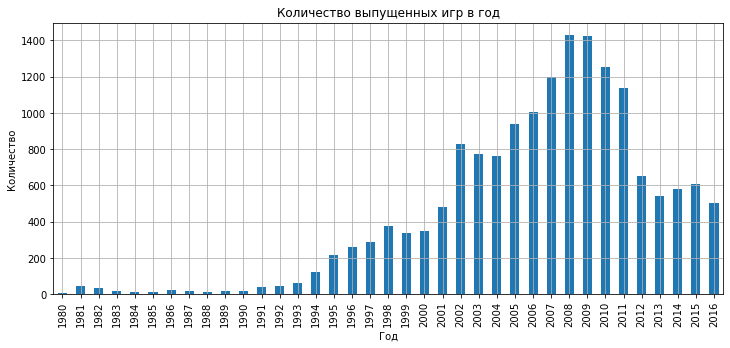

In [ ]:
data.groupby('year_of_release')['name'].count().reset_index().plot(kind='bar',
                                                                   x='year_of_release',
                                                                   legend=False,
                                                                   figsize=(12,5),
                                                                   )
plt.title('Количество выпущенных игр в год')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid()
plt.show()


Рост количества выпускаемых игр начался в 1994 году. Пик этого роста был достигнут а 2008-2009 годах, далее тенденция пошла на убыль. Уровень выпуска игр в 2016 году находится на уровне 2001 года.

Посмотрим суммарные продажи по платформам за весь меющийся у нас период.

In [ ]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
gb       254.43
xb       251.57
nes      251.05
n64      218.01
snes     200.04
gc       196.73
xone     159.32
2600      86.48
wiiu      82.19
psv       53.81
sat       33.59
gen       28.35
dc        15.95
scd        1.86
ng         1.44
ws         1.42
tg16       0.16
3do        0.10
gg         0.04
pcfx       0.03
Name: total_sales, dtype: float64

По первым 6-ти платформам построим распределение выпуски игр по годам.

In [ ]:
def dist_plot (platform):
    x1 =  data[(data['platform'] == platform)].groupby('year_of_release')['name'].count().reset_index().plot(kind='bar',
                                                                   x='year_of_release',
                                                                   legend=False,
                                                                   figsize=(7,5),
                                                                   )
    plt.title('Количество выпущенных ' + platform + ' игр в год')
    plt.xlabel('Год')
    plt.ylabel('Количество')
    plt.grid()
    plt.show()

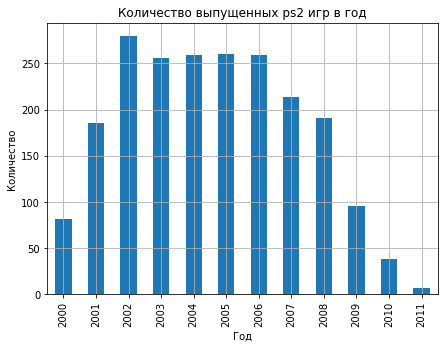

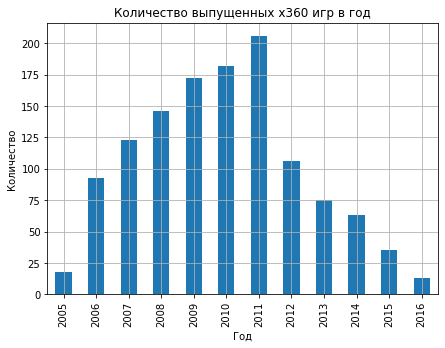

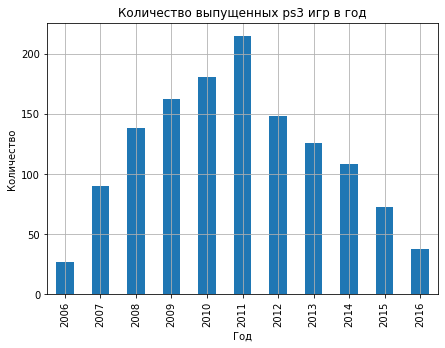

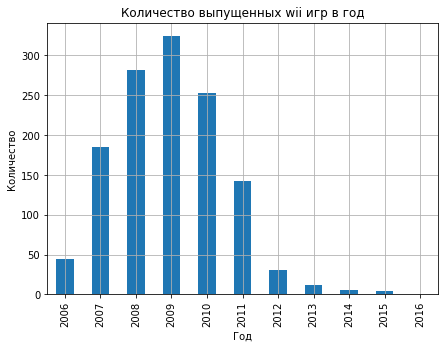

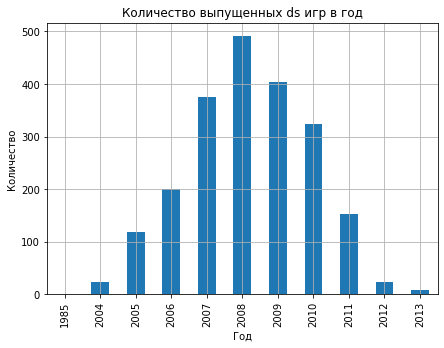

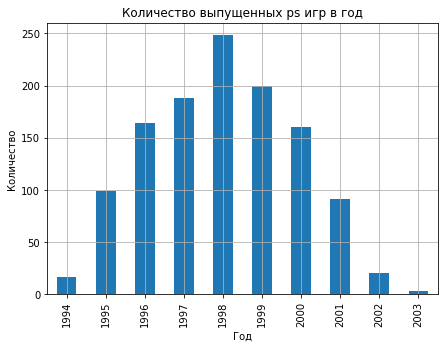

In [ ]:
platform_list = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
for i in platform_list:
    dist_plot(i) 

Как мы видим, по всем этим платформам распределение нормальное. И средняя продолжительность жизни платформ составляет 10-11 лет.

Как мы говорили ранее, дальнейший анализ будем проводить на актуальных данных. Для этого выберем только те игры, которые были выпущены после 2011 года (10 лет/2 - получается, что пик игры приходится на 5ый год(подтверждается графиком выше)), чтобы отследить пиковые значения за последние 5 лет.

In [ ]:
actual_data = data.query('year_of_release > 2011')

Построим графическое положение продаж тгр в разрезе платформ

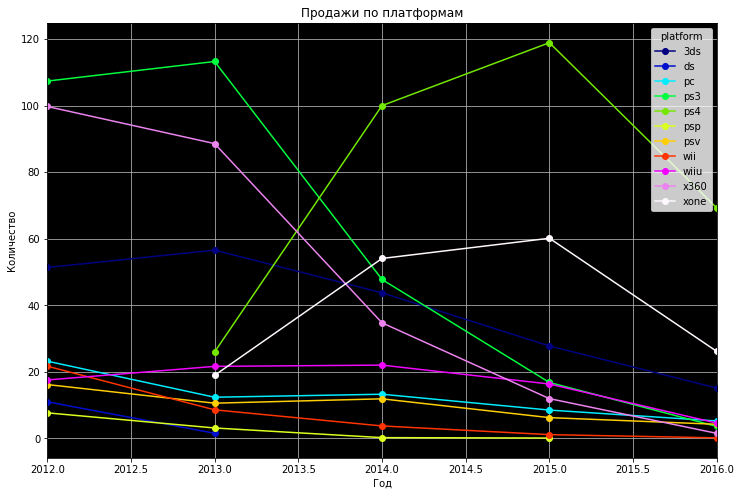

In [ ]:
for_plot_1 = actual_data.pivot_table(index='year_of_release', 
                        columns='platform', 
                        values='total_sales', 
                        aggfunc='sum')
for_plot_1.plot(kind='line', marker='o', figsize=(12,8), colormap='gist_ncar')
ax = plt.axes()
ax.set_facecolor("black")
plt.title('Продажи по платформам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid()
#plt.get_cmap('binary')
plt.show()

На основе построенного графика можно сделать следующие выводы:
1. Прошли свои пики и жизненный цикл идет/пришел к конце у следующих платформ:  
 - ps3;  
 - x360;
 - 3ds;  
 - pc;  
 - wii;  
 - wiiu;  
 - psv;  
 - ds;  
 - psp.  
2. Недавно вышешедшие платформы, которые еще могут принести прибыль:  
 -  ps4;  
 - xone.  
3. Самые большие продажи наблюдались у платформ 3ds, ps3, ps4, wii, x360. 


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

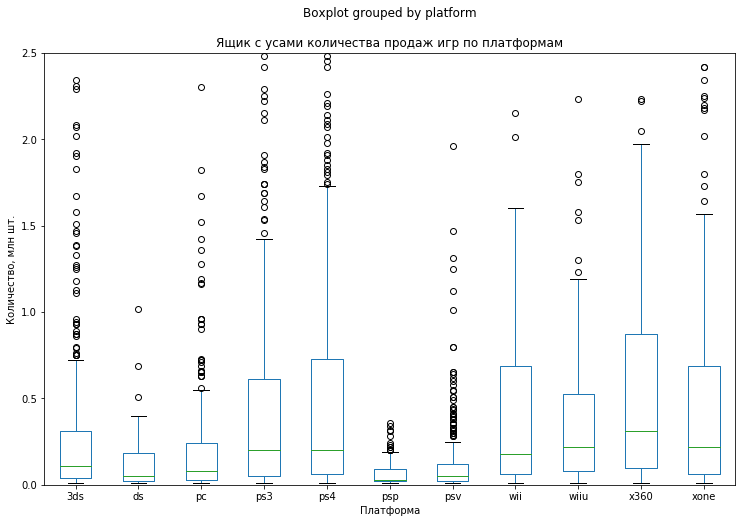

In [ ]:
actual_data.boxplot(column = 'total_sales', by='platform', figsize=(12,8),widths = 0.5)
plt.ylim([0,2.5])
plt.ylabel('Количество, млн шт.')
plt.xlabel('Платформа')

plt.tick_params(axis = 'both',
                which = 'major',
                labelsize = 10,
               )    
plt.title('Ящик с усами количества продаж игр по платформам')
plt.grid()
plt.show()


Ящик с усами показывает среднее количество (в млн) проданных экземпляров каждой игры на указанную платформу.  
Самые высокие медианные продажи наблюдаются у игр на платформах х360, ps3, ps4, wiiu и xone.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и рассчитаем корреляцию между отзывами и продажами.

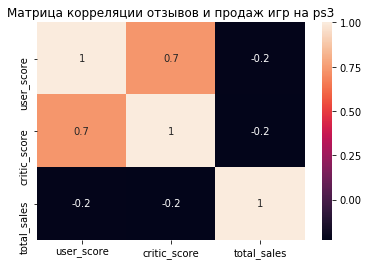

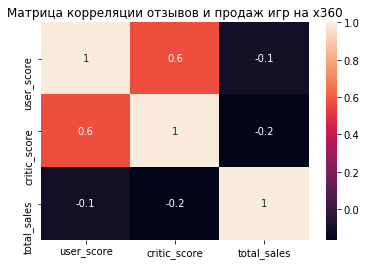

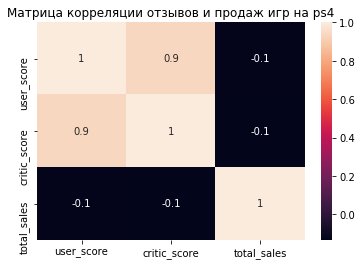

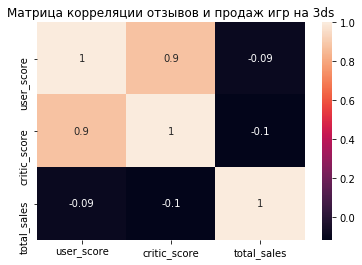

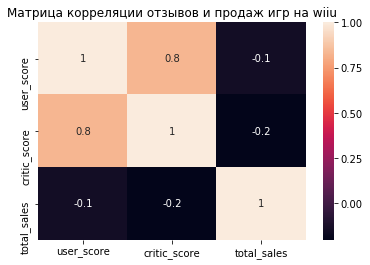

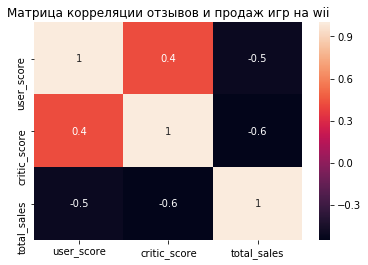

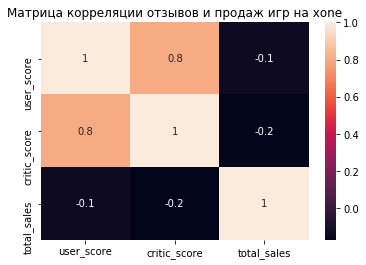

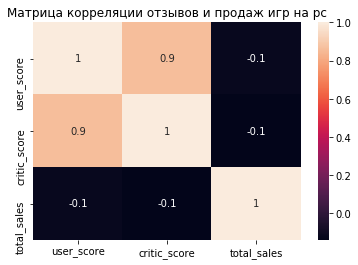

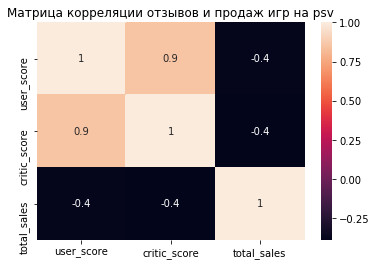

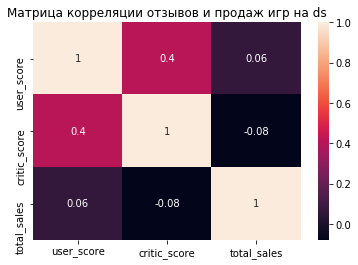

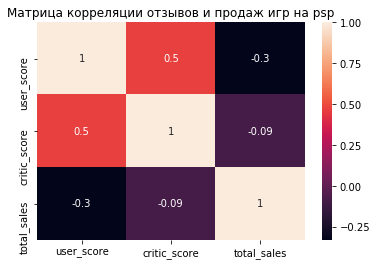

In [ ]:
corr_data = actual_data[['platform','user_score', 'critic_score', 'total_sales']]
popular_corr_data = corr_data.loc[(corr_data['critic_score'] < 500)&(corr_data['user_score'] < 500)]
popular_corr_data_platforms = popular_corr_data['platform'].unique()
def corr (platform):
    x3 = corr_data.loc[(corr_data['platform'] == platform)]
    corrMatrix = x3.corr()
    #corrMatrix = corr_data.query('platform == x_platform').corr()
    sn.heatmap(corrMatrix, annot=True, fmt='.1g')
    plt.title('Матрица корреляции отзывов и продаж игр на ' + platform)
    plt.show()
for i in popular_corr_data_platforms:
    corr(i)

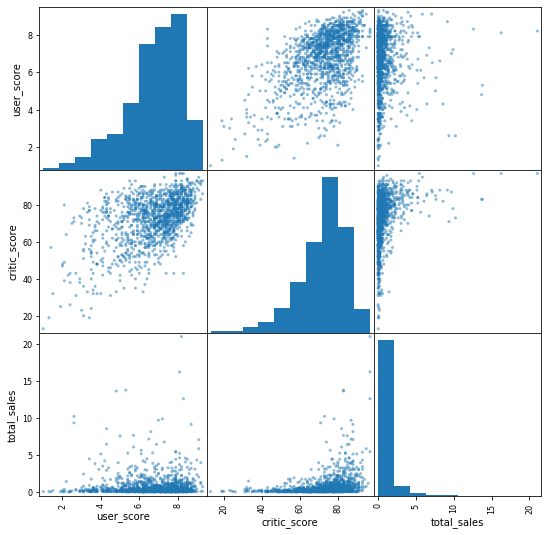

In [ ]:
pd.plotting.scatter_matrix(popular_corr_data, figsize=(9, 9)) 
plt.show()

Для расчета корреляционной матрицы мы исключили строки с играми, в которых отсутствуют оценки критиков и игроков.  
Из полученных результатов видно, что корреляция между отзывами и продажами игр почти отсутствует.  
Наибольшая корреляция (0,4) наблюдается по продажам игр на платформы x360, xone и ps4.  
Также для подтверждения полученных значений мы построили диаграммы рассеяния.
При этом корреляция между отзывами критиков и игроков положительная и достаточна большая.

Теперь посмотрим распределение количества и продаж игр по жанрам:

,жанр,Итого_продажи_млн_шт,количество
0,action,441.12,1031
1,adventure,29.43,302
2,fighting,44.49,109
3,misc,85.04,192
4,platform,61.00,85
5,puzzle,4.89,28
6,racing,53.50,115
7,role-playing,192.80,370
8,shooter,304.73,235
9,simulation,35.12,80


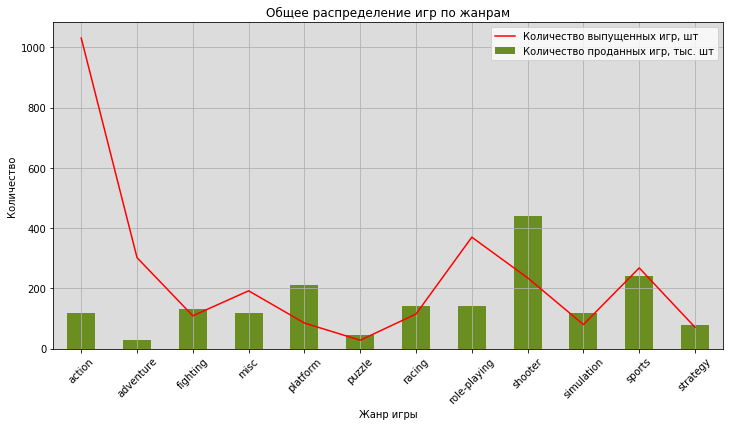

In [ ]:
for_plot_genres = actual_data.groupby('genre').agg({'total_sales': 'sum',
                                 'name': 'count'}).reset_index()
for_plot_genres.columns= ['жанр','Итого_продажи_млн_шт','количество']
display(for_plot_genres)

fig, ax = plt.subplots(figsize=(12, 6))
x=actual_data['genre'].unique()
ax1 = actual_data.groupby('genre')['name'].count()
ax2= actual_data.groupby('genre')['total_sales'].median()*1000
ax1.plot(x=x, color='r', label='Количество выпущенных игр, шт')
ax2.plot(x=x, kind='bar', rot=45, color='olivedrab', label='Количество проданных игр, тыс. шт')
plt.legend()
plt.grid()
ax.set_facecolor('gainsboro')
plt.title('Общее распределение игр по жанрам')
ax.set_ylabel('Количество') 
ax.set_xlabel('Жанр игры')
plt.show()

Как видно на графике - самый популярный тип игр - action. Количество игр превышает 1000, а количество проданных покий составляет более четырехсот миллионов штук(как видно из таблицы). На втором месте по продажам идет жанр shooter. Наименее популярные игры (как по продажам, так и по производству) - puzzle.  
При этом первое место по количеству медианных продаж занимает жанр shooter, на втором месте - sports, на третьем - platform.

## Предпочтения пользователей по регионам

In [ ]:
def region(reg, name):
  print('Топ-5 популярных платформ в ', name)
  top_platforms = actual_data.pivot_table(index='platform', values=reg, aggfunc='sum').reset_index()
  top_platforms['share']=top_platforms[reg]/(top_platforms[reg].sum())
  display(top_platforms[['platform','share']].sort_values(by='share',ascending=False).head().reset_index(drop=True))
  print()
  print('Топ-5 популярных жанров игр в ', name)
  top_genre = actual_data.pivot_table(index='genre', values=reg, aggfunc='sum').reset_index()
  top_genre['share']=top_genre[reg]/(top_genre[reg].sum())
  display(top_genre[['genre','share']].sort_values(by='share',ascending=False).head().reset_index(drop=True))
  print()
  print('Доля продаж игр в ', name,', в зависимости от классификации ESRB')
  esrb = actual_data.pivot_table(index='rating', values=reg, aggfunc='sum').reset_index()
  esrb['share']=esrb[reg]/(esrb[reg].sum())
  display(esrb[['rating','share']].sort_values(by='share',ascending=False).reset_index(drop=True))
  print('-------------------------------------------------------------------------------------------------')

In [ ]:
list_regions=[['na_sales','Северной Америке'],
              ['eu_sales','Европе'],
              ['jp_sales','Японии']]
for i in list_regions:
  region(i[0],i[1])

Топ-5 популярных платформ в  Северной Америке


,platform,share
0,x360,0.236983
1,ps4,0.184003
2,ps3,0.174933
3,xone,0.157571
4,3ds,0.093592



Топ-5 популярных жанров игр в  Северной Америке


,genre,share
0,action,0.300929
1,shooter,0.244970
2,sports,0.137960
3,role-playing,0.108297
4,misc,0.064623



Доля продаж игр в  Северной Америке , в зависимости от классификации ESRB


,rating,share
0,M,0.391847
1,E,0.193529
2,999,0.174814
3,E10+,0.128094
4,T,0.111715


-------------------------------------------------------------------------------------------------
Топ-5 популярных платформ в  Европе


,platform,share
0,ps4,0.278383
1,ps3,0.210844
2,x360,0.147034
3,xone,0.101792
4,3ds,0.084132



Топ-5 популярных жанров игр в  Европе


,genre,share
0,action,0.314392
1,shooter,0.223886
2,sports,0.136321
3,role-playing,0.095754
4,racing,0.053846



Доля продаж игр в  Европе , в зависимости от классификации ESRB


,rating,share
0,M,0.382700
1,E,0.223018
2,999,0.180537
3,E10+,0.109250
4,T,0.104495


-------------------------------------------------------------------------------------------------
Топ-5 популярных платформ в  Японии


,platform,share
0,3ds,0.455862
1,ps3,0.183249
2,psv,0.109253
3,ps4,0.082875
4,wiiu,0.067556



Топ-5 популярных жанров игр в  Японии


,genre,share
0,role-playing,0.339807
1,action,0.274172
2,misc,0.066777
3,simulation,0.054055
4,fighting,0.049019



Доля продаж игр в  Японии , в зависимости от классификации ESRB


,rating,share
0,999,0.565168
1,E,0.147108
2,T,0.135113
3,M,0.110084
4,E10+,0.042528


-------------------------------------------------------------------------------------------------


Популярность приставки Xbox в Америке можно объяснить тем, что она выпускается в США. В то время, как PS была разработана в Японии.  
Предпочтения по жанрам совпадают у пользователей в Северной Америке и Европе: action, shooter, sports,	role-playing.  
В Японии пользователи отдают предпочтения следующим жанрам: role-playing, action, misc, simulation, fighting. Могу предположить, что это связано с различиями в культуре, например, в Японии всегда особое место занимали боевые искусства, в связи с чем в рейтинге есть fighting и отсутствует shooter.  
Рейтинг ESRB также совпадает в Северной Америке и Европе. В Японии боьшинству игр не присвоен рейтинг ESRB (56,5%).  
Можно сделать вывод, что пользователи Северной Америки и Европы несильно отличаются друг от друга.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для подтверждения / опровержения данной гипотезы найдем средний пользовательский рейтинг игр на платформе Xbox. И сформируем гипотезы:  
Н0 - Средние рейтинги Xbox One и PC одинаковые.  
Н1 - Средние рейтинги Xbox One и PC одинаковые различаются.  
Пользовательский рейтинг оценивается от 0-10. За критический уровень статистической значимости примем 3%.  
Используем метод st.ttest_ind для подтверждения / опровержения Гипотезы о равенстве средних двух генеральных совокупностей.

In [ ]:
xone = actual_data.query('platform == "xone" & user_score < 500')['user_score']
pc = actual_data.query('platform == "pc" & user_score < 500')['user_score']
alpha = 0.03

results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Мы подтвердили нулевую гипотезу. Таким образом, средний рейтинг приставок Xbox One b PC совпадает.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для подтверждения / опровержения данной гипотезы найдем средние пользовательские рейтинги Action игр и Sports игр.  
И сформируем гипотезы:  
Н0 - Средние пользовательские рейтинги AAction и Sports игр одинаковаые.  
Н1 - Средние пользовательские рейтинги AAction и Sports игр различаются.  
За критический уровень статистической значимости примем 3%.
Нас интересует различаются ли рейтинги игр как в большую, так и в меньшую сторону, тогда используем метод st.ttest_1samp для подтверждения / опровержения двусторонней гипотезы.

In [ ]:
action_mean = actual_data.query('genre == "action" & user_score < 500')['user_score'].mean()
sports = actual_data.query('genre == "sports" & user_score < 500')['user_score']
optimal_revenue = action_mean

alpha = 0.03

results = st.ttest_1samp(sports, optimal_revenue)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.569226585064298e-22
Отвергаем нулевую гипотезу


Мы опровергли нулевую гипотезу. Таким образом, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

##Вывод

При планировании рекламной компании на 2017 год я бы акцентировала внимание на играх для следующих платформ: PS4 и Xbox One. Причем для рынка Северной Америки упор необходимо сделать на Xbox One, а на рынке Европы и Японии - на PS4.  
Относительно жанров: на рынке Северной Америки и Европы следует уделить особое внимание играм в жанрах action и shooter в категории "Для взрослых"(M) и "Для всех"(E).  
На рынке Японии следует отдат предпочтение играм в стиле role-playing и action.